# Cardinality Constrained Portfolio Optimization Analysis

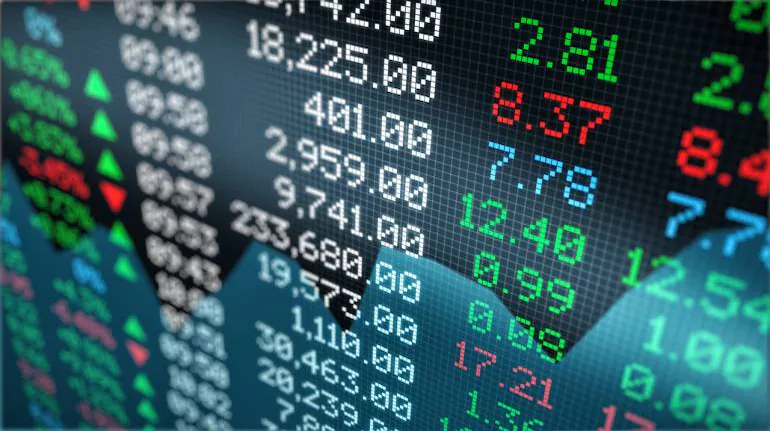

## Introduction

The analysis outlined below will focus on comparing the performance of the random search and genetic algorithms used to optimise cardinality constrained portfolios (portfolios limited to 10 stocks with a given minimum and maximum investmet). The main objective of the optimization was to minimize value of F (see F-value part of the analysis). Alternating the risk/return preference, each of the two algorithms optimized total of 50 portfolios across 5 datasets, resulting in total of 500 optimized portfolios.

To begin with we will load data created by Random Search.py and Genetic Algorithm.py. The performance of the two algorithms will be compared on the portfolios expected return, covariance, F-values and efficient frontiers, suggesting that portfolios optimized by genetic algorithm achieve much better results. In addition, it will be shown that allocation of investment into the 10 assets by random search is rather irrespective of the risk/return preference. Lastly, the analysis will argue that if the population size parameter of the genetic algorithm is greater than 9, its optimization performance is not considerably influenced.

(Please note: More information on the algorithms and the main objective can be found in README.md)

## Loading the Data

The data files returned by Random Search.py and Genetic Algorithm.py will be loaded into dictionaries for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

results_RS = {}
stats_RS = {}
results_GA = {}
stats_GA = {}

file_names = ['assets1','assets2','assets3','assets4','assets5']
index_names = ['Hang Seng', 'DAX 100', 'FTSE 100', 'S&P 100', 'Nikkei 225']
algorithms = ['RS','GA']
stat_rows = ['Min', 'Max', 'Mean', 'Std']

# Loading files into dictionaries
for file in file_names:
    for alg in algorithms:
        if alg == 'RS':
            df_results = pd.read_csv('Generated data/Different Lambdas/results_{}_{}.csv'.format(alg, file))
            results_RS[file] = df_results
            
            df_stats = pd.read_csv('Generated data/Different Lambdas/stats_{}_{}.csv'.format(alg, file))
            df_stats.index = stat_rows
            stats_RS[file] = df_stats

        elif alg == 'GA':
            df_results = pd.read_csv('Generated data/Different Lambdas/results_{}_{}.csv'.format(alg, file))
            results_GA[file] = df_results
            
            df_stats = pd.read_csv('Generated data/Different Lambdas/stats_{}_{}.csv'.format(alg, file))
            df_stats.index = stat_rows
            stats_GA[file] = df_stats



## Performance comparison

Now that we have loaded our data we will start the analysis by looking at values of expected returns, covariances and F values respectively.


### Expected Return

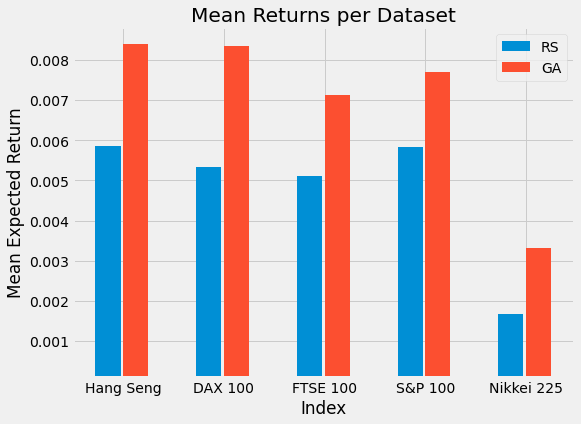

Mean % difference in expected return: 53.89%


In [2]:
#Extracting mean returns for analysis
Mean_returns_RS = [stats_RS['assets{}'.format(i)].loc['Mean','Return stats'] for i in range(1,6)]
Mean_returns_GA = [stats_GA['assets{}'.format(i)].loc['Mean','Return stats'] for i in range(1,6)]

x = np.array([1,2,3,4,5])

style.use('fivethirtyeight')

fig = plt.figure(figsize = (8,6))
plt.bar(x,Mean_returns_RS, label = 'RS', width = 0.25, align = 'center', tick_label = index_names)
plt.bar(x + 0.15 ,Mean_returns_GA, label = 'GA', width = 0.25, align = 'edge', tick_label = index_names)
plt.legend()
plt.title('Mean Returns per Dataset')
plt.xlabel('Index')
plt.ylabel('Mean Expected Return')
plt.ylim(0.0001)
plt.show()


Mean_difference = [((Mean_returns_GA[i] - Mean_returns_RS[i]) / Mean_returns_RS[i] * 100) for i in range(5)]
print('Mean % difference in expected return: {}%'.format(round(np.mean(Mean_difference),2)))

Firstly, it is quite apparent that performance of the Nikkei 225 index is a lot worse compared to other indexes. This, will hopefully show some great insights on performance of the algorithms when chosen assets are not performing well.

Secondly, we can see mean expected returns of portfolios optimized by genetic algorithm (GA) are consistenly higher than those optimized by random search (RS). On average they show 53.89% higher returns than their RS counter parts. Similar patterns would be found if we were to explore maximum expected returns. This, however, would not be the case for min returns.

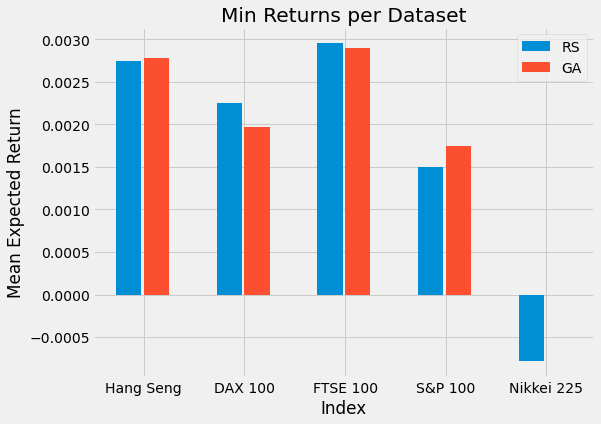

Random Search Nikkei 225 min expected return: -0.0007862961357095
Genetic Algorithm Nikkei 225 min expected return: -6.03013399293206e-06
Difference: -99.23%


In [3]:
Min_returns_RS = [stats_RS['assets{}'.format(i)].loc['Min','Return stats'] for i in range(1,6)]
Min_returns_GA = [stats_GA['assets{}'.format(i)].loc['Min','Return stats'] for i in range(1,6)]

x = np.array([1,2,3,4,5])

fig = plt.figure(figsize = (8,6))
plt.bar(x, Min_returns_RS, label = 'RS', width = 0.25, align = 'center', tick_label = index_names)
plt.bar(x + 0.15, Min_returns_GA, label = 'GA', width = 0.25, align = 'edge', tick_label = index_names)
plt.legend()
plt.title('Min Returns per Dataset')
plt.xlabel('Index')
plt.ylabel('Mean Expected Return')
plt.show()

print('Random Search Nikkei 225 min expected return: {}'.format(Min_returns_RS[4]))
print('Genetic Algorithm Nikkei 225 min expected return: {}'.format(Min_returns_GA[4]))
difference = (Min_returns_GA[4] - Min_returns_RS[4])/Min_returns_RS[4] * 100
print('Difference: {}%'.format(round(difference,2)))

The figure above reveals that for minimum expected returns the performance of the algorithms is a lot more balanced. Rather suprisingly, RS outperforms GA for DAX100 and FTSE100. Important point to make is that on Nikkei 225 both algorithms score negative epected returns. The difference, however, is quite significant. In percentage terms the min expected return is 99,23% lower for RS. This shows that GA does also very well on minimizing min expected return on assets that are not performing well generally.

### Covariance

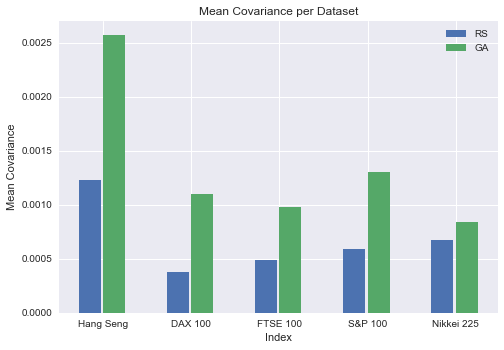

In [4]:
Mean_cov_RS = [stats_RS['assets{}'.format(i)].loc['Mean','Covariance stats'] for i in range(1,6)]
Mean_cov_GA = [stats_GA['assets{}'.format(i)].loc['Mean','Covariance stats'] for i in range(1,6)]

style.use('seaborn')
x = np.array([1,2,3,4,5])
fig = plt.figure(figsize = (7,5))
plt.bar(x,Mean_cov_RS, label = 'RS', width = 0.25, align = 'center', tick_label = index_names)
plt.bar(x + 0.15, Mean_cov_GA, label = 'GA', width = 0.25, align = 'edge', tick_label = index_names )
plt.legend()
plt.title('Mean Covariance per Dataset')
plt.xlabel('Index')
plt.ylabel('Mean Covariance')
plt.show()




For the purpose of this analysis the measure of "covariance" will be considered as an indicator of risk. T.-J. Chang, et. al (2000) use the terms covariance and expected variance of a portfolio interchangeably but generally use them to point towards risk. By definition it is a statistical measure of the directional relationship between two asset returns. A positive covariance between two assets indicates that the assets tend to move together (Investopedia, 2021a). Thats is why we see the porfolios with assets from Hang Seng index having the highest mean covariance. The index contains "only", compared to other indexes, 31 stocks. Great proportion of the companies are from similar industries or have other connection (Wikipedia 2021). Hence tend to move together. Containing more assets, with higher variety, the rest of the indexes are more diversified for risk.

The figure above also shows that the mean covariance of porfolios optimized using GA is consistenly higher for all indexes. This is expected as GA also created portfolios with higher average expected return, and as is well known, higher returns come with a higher risk. In future parts of this analysis we shall show that even though the mean covariance for GA is higher, its portfolios consistently offer better risk/return combinations, than those of RS.

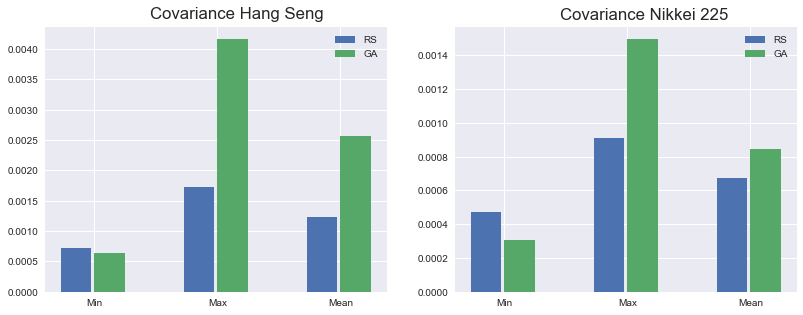

In [5]:
stats_dataset1_RS = stats_RS['assets1'].loc[['Min','Max','Mean'],'Covariance stats']
stats_dataset5_RS= stats_RS['assets5'].loc[['Min','Max','Mean'],'Covariance stats']

stats_dataset1_GA = stats_GA['assets1'].loc[['Min','Max','Mean'],'Covariance stats']
stats_dataset5_GA= stats_GA['assets5'].loc[['Min','Max','Mean'],'Covariance stats']

x = np.array([1,2,3])

figure = plt.figure(figsize = (12,10))
ax1 = plt.subplot(2, 2, 1)
ax1.bar(x, stats_dataset1_RS, width = 0.25, align = 'center', label = 'RS')
ax1.bar(x + 0.15, stats_dataset1_GA, width = 0.25, align = 'edge', label = 'GA')
ax1.text(1.6, 0.0045, 'Covariance Hang Seng', fontsize = 'large')
plt.xticks(x + 0.15, stats_dataset1_RS.index)
plt.legend()

ax2 = plt.subplot(2,2,2)
ax2.bar(x, stats_dataset5_RS, width = 0.25, align = 'center', label = 'RS')
ax2.bar(x + 0.15, stats_dataset5_GA, width = 0.25, align = 'edge', label = 'GA')
ax2.text(1.6, 0.00161, 'Covariance Nikkei 225', fontsize = 'large')
plt.xticks(x + 0.15, stats_dataset5_RS.index)
plt.legend()
plt.show()


If we were to compare covariance across datasets (contrasting indexes with biggest differences) we would find that minimum covariances returned by RS are a little higher than those of GA. Other than that the results are pretty obvious where both mean and maximum covariances returned by GA are higher.  

### F - value

F-value is the metric our algorithms are trying to minimize. Different values of 𝜆  represent distinct preferences towards risk/return tradeoffs (See formula below). I.e. 𝜆 = 1 represents a totally risk averse investor whilst 𝜆 = 0 represents a totally risk taking investor.
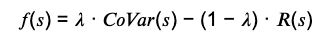

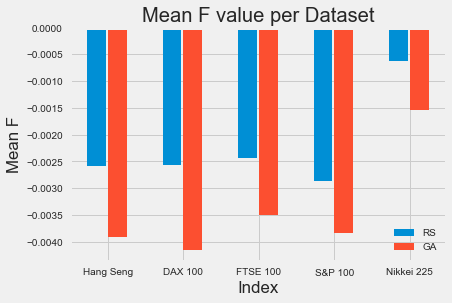

Mean % difference of F values: 67.14%


In [6]:
Mean_f_RS = [stats_RS['assets{}'.format(i)].loc['Mean','F value stats'] for i in range(1,6)]
Mean_f_GA = [stats_GA['assets{}'.format(i)].loc['Mean','F value stats'] for i in range(1,6)]

style.use('fivethirtyeight')

x = np.array([1,2,3,4,5])
fig = plt.figure(figsize = (6,4))
plt.bar(x,Mean_f_RS, label = 'RS', width = 0.25, align = 'center', tick_label = index_names)
plt.bar(x + 0.15, Mean_f_GA, label = 'GA', width = 0.25, align = 'edge', tick_label = index_names )
plt.legend()
plt.title('Mean F value per Dataset')
plt.xlabel('Index')
plt.ylabel('Mean F')
plt.show()


Mean_difference = [((Mean_f_GA[i] - Mean_f_RS[i]) / Mean_f_RS[i] * 100) for i in range(5)]
print('Mean % difference of F values: {}%'.format(round(np.mean(Mean_difference),2)))

Analysis of the computed mean F values shows that GA does significantly better at minimizing F values. In particular the average F value of portfolios optimized by GA is 67.14% lower than by those optimized by RS.


### Efficient Frontiers

By definition efficient frontier is: "the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return" (Investopedia, 2021b). Formally, it is the set of portfolios which satisfy the condition that no other portfolio exists with a higher expected return but with the same level of risk.

In [7]:
def data_frames(filename):
    """Sort return values in a dataframe"""
    new_df = filename.sort_values('Returns', axis=0, ascending=False)
    return new_df


def eff_frontier_points(i, returns1, covariances1, returns2, covariances2):
    """Calculates which portfolios are efficient"""
    for x, y in zip(returns1, covariances1):
        if returns1[i] > x and covariances1[i] < y:
            if x in returns2:
                returns2.remove(x)
            if y in covariances2:
                covariances2.remove(y)

def eff_frontier(df):
    """Returns a df with efficient portfolios"""
    portfolios = []
    returns1 = df['Returns'].tolist()
    covariances1 = df['Covariances'].tolist()
    returns2 = df['Returns'].tolist()
    covariances2 = df['Covariances'].tolist()
    for i in range(len(returns1)):
        eff_frontier_points(i, returns1, covariances1, returns2, covariances2)
    for x, y in zip(returns2, covariances2):
        portfolios.append([x, y])
    df2 = pd.DataFrame(portfolios)
    df2.columns = ['Returns', 'Covariances']
    return df2

### Comparing Frontiers  across Datasets

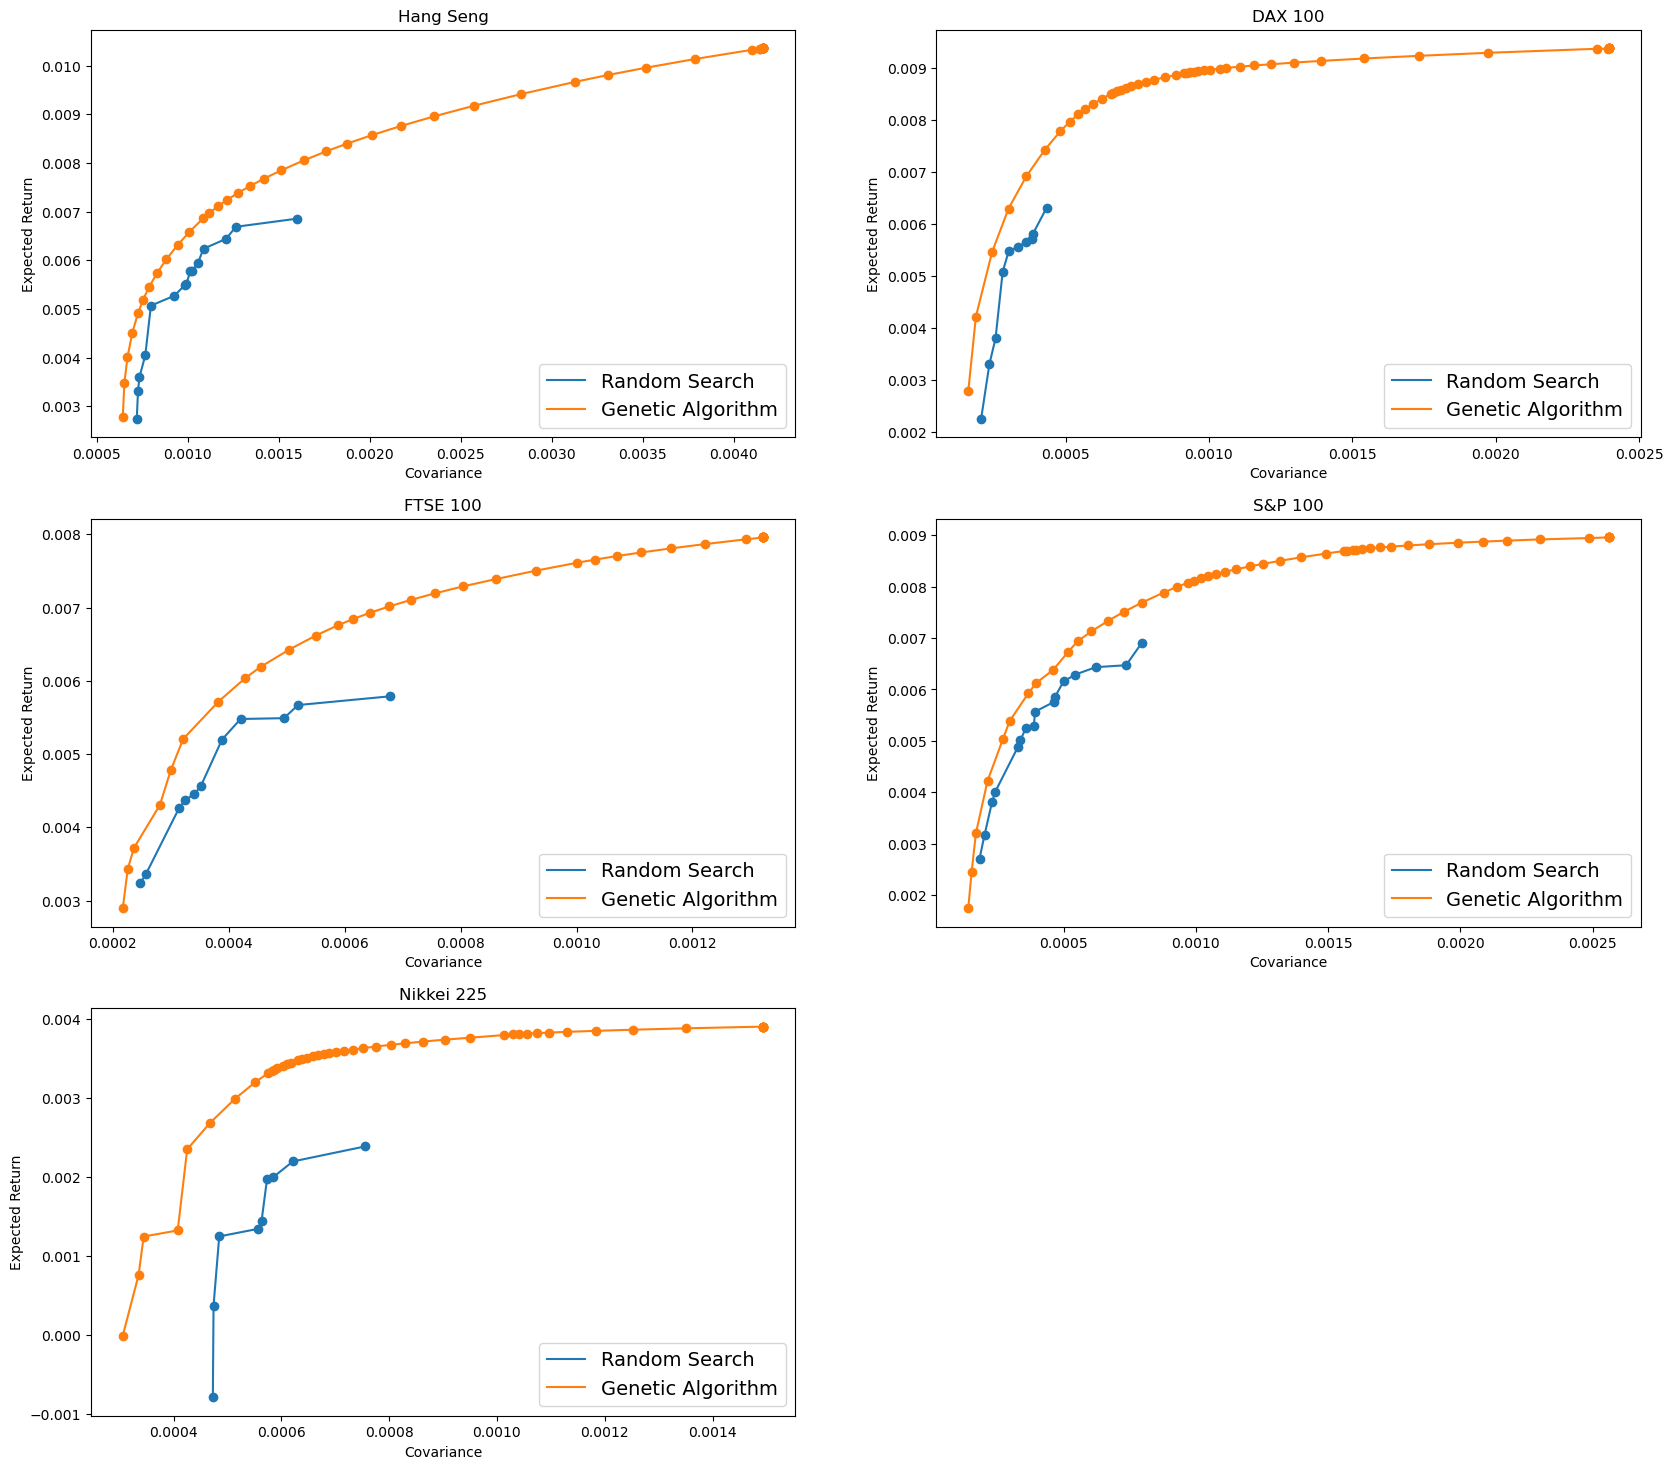

In [8]:
style.use('default')
asset_files_GA = [results_GA['assets1'], results_GA['assets2'], results_GA['assets3'], results_GA['assets4'], results_GA['assets5']]
asset_files_RS = [results_RS['assets1'], results_RS['assets2'], results_RS['assets3'], results_RS['assets4'], results_RS['assets5']]

cov_rs = []
ret_rs = []
cov_ga = []
ret_ga = []

for file in asset_files_RS:
    df = data_frames(file)
    new_df = eff_frontier(df)
    cov_rs.append([new_df['Covariances']])
    ret_rs.append([new_df['Returns']])
    
for file in asset_files_GA:
    df = data_frames(file)
    new_df = eff_frontier(df)
    cov_ga.append([new_df['Covariances']])
    ret_ga.append([new_df['Returns']])

    
figure = plt.figure(figsize = (20,18))
ax1 = plt.subplot(3, 2, 1)
ax1.plot(cov_rs[0][0], ret_rs[0][0], label = 'Random Search')
ax1.plot(cov_ga[0][0], ret_ga[0][0], label = 'Genetic Algorithm')
ax1.scatter(cov_rs[0][0], ret_rs[0][0])
ax1.scatter(cov_ga[0][0], ret_ga[0][0])
ax1.title.set_text(index_names[0])
ax1.set_xlabel('Covariance')
ax1.set_ylabel('Expected Return')
ax1.legend(loc = 'lower right', prop = {'size':14})


ax2 = plt.subplot(3, 2, 2)
ax2.plot(cov_rs[1][0], ret_rs[1][0], label = 'Random Search')
ax2.plot(cov_ga[1][0], ret_ga[1][0], label = 'Genetic Algorithm')
ax2.scatter(cov_rs[1][0], ret_rs[1][0])
ax2.scatter(cov_ga[1][0], ret_ga[1][0])
ax2.title.set_text(index_names[1])
ax2.set_xlabel('Covariance')
ax2.set_ylabel('Expected Return')
ax2.legend(loc = 'lower right', prop = {'size':14})

ax3 = plt.subplot(3, 2, 3)
ax3.plot(cov_rs[2][0], ret_rs[2][0], label = 'Random Search')
ax3.plot(cov_ga[2][0], ret_ga[2][0], label = 'Genetic Algorithm')
ax3.scatter(cov_rs[2][0], ret_rs[2][0])
ax3.scatter(cov_ga[2][0], ret_ga[2][0])
ax3.title.set_text(index_names[2])
ax3.set_xlabel('Covariance')
ax3.set_ylabel('Expected Return')
ax3.legend(loc = 'lower right', prop = {'size':14})

ax4 = plt.subplot(3, 2, 4)
ax4.plot(cov_rs[3][0], ret_rs[3][0], label = 'Random Search')
ax4.plot(cov_ga[3][0], ret_ga[3][0], label = 'Genetic Algorithm')
ax4.scatter(cov_rs[3][0], ret_rs[3][0])
ax4.scatter(cov_ga[3][0], ret_ga[3][0])
ax4.title.set_text(index_names[3])
ax4.set_xlabel('Covariance')
ax4.set_ylabel('Expected Return')
ax4.legend(loc = 'lower right', prop = {'size':14})

ax5 = plt.subplot(3, 2, 5)
ax5.plot(cov_rs[4][0], ret_rs[4][0], label = 'Random Search')
ax5.plot(cov_ga[4][0], ret_ga[4][0], label = 'Genetic Algorithm')
ax5.scatter(cov_rs[4][0], ret_rs[4][0])
ax5.scatter(cov_ga[4][0], ret_ga[4][0])
ax5.title.set_text(index_names[4])
ax5.set_xlabel('Covariance')
ax5.set_ylabel('Expected Return')
ax5.legend(loc = 'lower right', prop = {'size':14})

plt.show()

The 5 figures above display efficient frontiers constructed from portfolios optimized by GA and RS across datasets. Despite the fact that GA optimized portfolios display higher mean covariance, its effcient frontier portfolios offer consistently better risk/return combinations on all five datasets than those of RS. 

### Comparing Frontiers (Algorithms)

In [9]:
def all_frontiers(asset_files, title):
    """Plots all frontiers for a given algorithm in one figure"""
    cov = []
    ret = []
    colors = ['black', 'blue', 'purple', 'orange', 'brown']
    for file in asset_files:
        df = data_frames(file)
        new_df = eff_frontier(df)
        cov.append(new_df['Covariances'])
        ret.append(new_df['Returns'])
    plt.figure(figsize=(6, 4), facecolor='white')
    plt.xlim([0.00, 0.0045])
    plt.grid()
    for x, y, c in zip(cov, ret, colors):
        plt.plot(x, y, color=c)
        plt.scatter(x, y, color=c, s = 8)
    plt.legend(index_names, loc='lower right')
    plt.title(title)
    plt.xlabel('Covariance')
    plt.ylabel('Return')




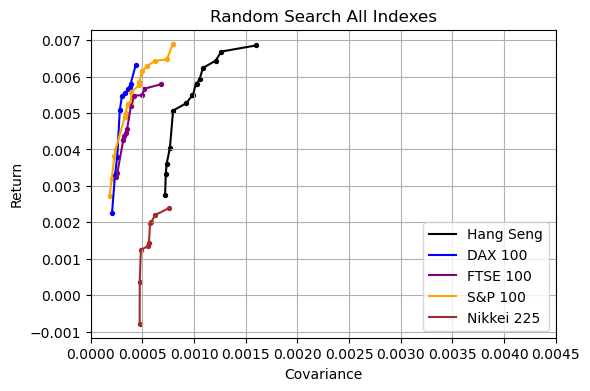

In [10]:
all_frontiers(asset_files_RS, 'Random Search All Indexes')

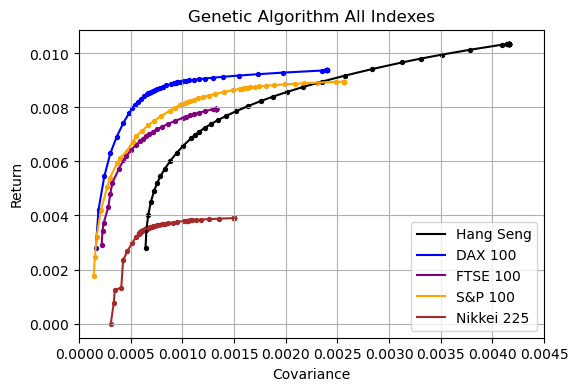

In [11]:
all_frontiers(asset_files_GA, 'Genetic Algorithm All Indexes')

Comparing frontiers returned by the two algorithms shows that in both cases portfolios from the Hang Seng index offer highest expected returns, whilst S&P 100 portfolios offer lowest risk. Once again it is quite apparent that GA portfolios display much better risk/return combinations.

If we were to make an investment recommendation based on the analysis so far (using 𝜆 as an investor's preference towards risk):
1. For 𝜆 = 0 (Risk taking investor): it is recommended to invest into portfolios located in the top right corner of the Hang Seng index.
2. For 𝜆 = 1 (Risk averse investor): it is recommended to invest into portfolios located in the bottom left corner of the S&P100 index.
3. For 𝜆 = 0.5 (Balanced preference towards risk/return): it is recommended to invest into portfolios located in the top left corner of the DAX 100 index.

(Assuming all portfolios were optimized using GA)


## Analysis of Weights

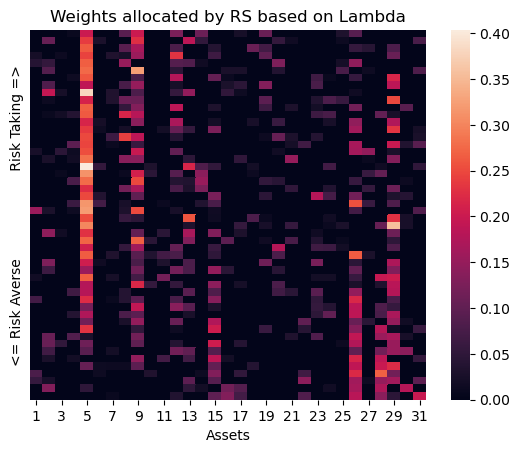

In [12]:
# Extracting weights from results dictionary
weights_RS = results_RS['assets1'].loc[:,[str(i) for i in range(1, int(results_RS['assets1'].columns[-1]) + 1)]]
sns.heatmap(weights_RS)
plt.ylabel('<= Risk Averse'+' '*20+'Risk Taking =>')
plt.xlabel('Assets')
plt.yticks([])
plt.title("Weights allocated by RS based on Lambda")
plt.show()

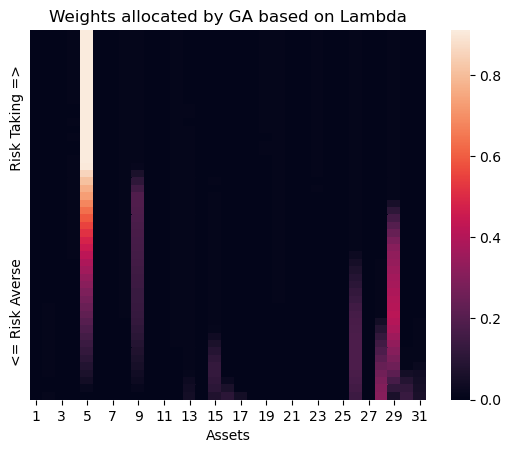

Asset 5 has the highest expected return of: 0.010865


In [13]:
#Extracting weights
weights_GA = results_GA['assets1'].loc[:,[str(i) for i in range(1, int(results_GA['assets1'].columns[-1]) + 1)]]
sns.heatmap(weights_GA)
plt.ylabel('<= Risk Averse'+' '*20+'Risk Taking =>')
plt.xlabel('Assets')
plt.yticks([])
plt.title("Weights allocated by GA based on Lambda")
plt.show()

# Extracting the maximum expected return from the original file
assets_1 = pd.read_csv('Datasets/assets1.txt')
assets_1 = assets_1.iloc[:31,0].str.split(' ')
assets_1 = assets_1.apply(lambda x: x[1]) #Exctracts expected return
max_exp_return = assets_1[assets_1 == assets_1.max()]
print('Asset {} has the highest expected return of: {}'.format(max_exp_return.index[0] + 1, float(max_exp_return)))

The allocation of weights by RS seems rather random. Other than the fact that it tends to invest heavily into asset number 5 (which has the highest expected return), there is no clear pattern of weight allocation.

If we look at weights assigned by GA, on the other hand, we can see a clear pattern following the risk preference. For a risk averse investor (i.e. 𝜆 = 1) the algorithm divides the investment uniformly across the 10 stocks resulting in a portfolio optimized for low risk. On the contrary, for a risk taking investor (i.e. 𝜆 = 0), GA places only minimum investment to 9 stocks and places the rest into stock number 5. This portfolio is optimized for return however bears great amount of risk.

Similar patterns would be found if we examined the weights for the rest of data sets.

## Genetic Algorithm Altering Population Size


### Analysis of F-values


Many models used in data analytics and programming have parameters that alter their performance. In case of genetic algorithm, we are going to focus on population size (P). So far in the analysis, we considered portfolios optimized by GA using P = 100. Now we will explore how changing the population size values to (P = 1, P = 10, P = 50, P = 100, P = 200, P = 500) influences the results. For this analysis, 𝜆 is fixed to 0.5 and variation is introduced by changing the random seed 30 times. Perfomance of GA across population sizes will be judged using median as it was found that for lower values of P, the mean was influenced. 

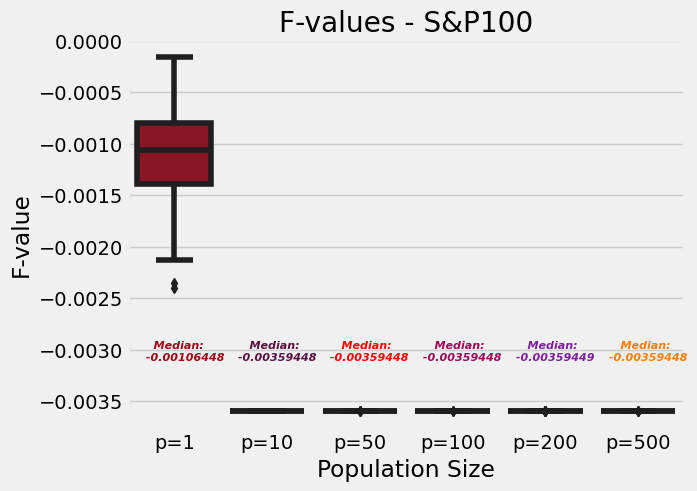

In [14]:
# Loading data for different population sizes of dataset 1 into dictionaries
results_GA_P = {}
stats_GA_P = {}

algorithms = ['RS','GA']
stat_rows = ['Min', 'Max', 'Mean', 'Std']
population_sizes = ['p=1','p=10','p=50','p=100','p=200','p=500']

for file in file_names:
    for pop in population_sizes:
                df_results = pd.read_csv('Generated data/Different Populations/results_GA_{}_{}.csv'.format(pop, file))
                results_GA_P[file+'_'+pop] = df_results

                df_stats = pd.read_csv('Generated data/Different Populations/stats_GA_{}_{}.csv'.format(pop, file))
                df_stats.index = stat_rows
                stats_GA_P[file+'_'+pop] = df_stats
            

# Extracting F values and calculating Median values for P=1 - P=500            
F_vals_GA_assets_4 = []
for pop in population_sizes:
    F_vals_GA_assets_4.append(results_GA_P['assets4_{}'.format(pop)] ['F values'])

Median_F_assets_4 = []
for vals in F_vals_GA_assets_4:
    Median_F_assets_4.append(vals.median())

    
# Using a box plot to display the F values across different population sizes
style.use('fivethirtyeight')

palette = ['#9D0216','#580F41','#FE0002','#9D0759','#7E1E9C','#FB7F07']

sns.boxplot(data = F_vals_GA_assets_4, palette = palette[:-1])
plt.xticks(np.arange(6),population_sizes)
plt.ylabel('F-value')
plt.xlabel('Population Size')
plt.title('F-values - S&P100')
plt.text(-0.35, -0.0031, '   Median:\n ' +str(round(Median_F_assets_4[0],8)), style='italic', fontsize = 8, color = palette[0], fontweight='bold')
plt.text(0.64, -0.0031, '    Median:\n ' +str(round(Median_F_assets_4[1],8)), style='italic', fontsize = 8, color = palette[1], fontweight='bold')
plt.text(1.64, -0.0031, '    Median:\n ' +str(round(Median_F_assets_4[2],8)), style='italic', fontsize = 8, color = palette[2], fontweight='bold')
plt.text(2.64, -0.0031, '    Median:\n ' +str(round(Median_F_assets_4[3],8)), style='italic', fontsize = 8, color = palette[3], fontweight='bold')
plt.text(3.64, -0.0031, '    Median:\n ' +str(round(Median_F_assets_4[4],8)), style='italic', fontsize = 8, color = palette[4], fontweight='bold')
plt.text(4.64, -0.0031, '    Median:\n ' +str(round(Median_F_assets_4[5],8)), style='italic', fontsize = 8, color = palette[5], fontweight='bold')
plt.show()


Examining F values across varying popuplation sizes for S&P100 reveals that except for p=1 median values are very similar. This indicates that as long as the the population size will be set to p >= 10, the performance of GA will not be heavily influenced. If we examined the minumum median F values for other indexes, we would find similar results. Regardless of the small differences, we shall next try and find out the optimal value for population size.

In [15]:
# Finding the best population size
for file,name in zip(file_names,index_names):
    F_vals = []
    # Loading F values for all indexes and all population sizes
    for pop in population_sizes:
        F_vals.append(results_GA_P['{}_{}'.format(file,pop)] ['F values']) 
    Median_F = []
    # Looking for the minimum median
    for vals in F_vals:
        Median_F.append(vals.median())
    min_median = min(Median_F)
    index_med = Median_F.index(min_median)
    print('For optimizing {} the best population size is {}, with minimum median of {}.'
          .format(name, population_sizes[index_med], min_median))
    

For optimizing Hang Seng the best population size is p=100, with minimum median of -0.0033039944097362.
For optimizing DAX 100 the best population size is p=100, with minimum median of -0.0039905966519017.
For optimizing FTSE 100 the best population size is p=200, with minimum median of -0.00332321883202295.
For optimizing S&P 100 the best population size is p=200, with minimum median of -0.00359448502599495.
For optimizing Nikkei 225 the best population size is p=100, with minimum median of -0.0014406718668546.


At first glance it seems that p=100 and p=200 are the best parameters for population size. To choose a better one out of the two, we will examine their mean range values of F.

In [16]:
# Examining range of F-values for p=100 and p=200
F_vals_GA_p_100 = []
for file in file_names:    
    F_vals_GA_p_100.append(results_GA_P['{}_p=100'.format(file)] ['F values'])
    
F_vals_GA_p_200 = []
for file in file_names:    
    F_vals_GA_p_200.append(results_GA_P['{}_p=200'.format(file)] ['F values'])

# Calculating average ranges across datasets
Max_p_100 = np.array([max(F_vals_GA_p_100[i]) for i in range(5)])
Min_p_100 = np.array([min(F_vals_GA_p_100[i]) for i in range(5)])
Max_p_200 = np.array([max(F_vals_GA_p_200[i]) for i in range(5)])
Min_p_200 = np.array([min(F_vals_GA_p_200[i]) for i in range(5)])

# Taking average of the range values
avg_range_p_100 = np.mean(Max_p_100 - Min_p_100)
avg_range_p_200 = np.mean(Max_p_200 - Min_p_200)

ranges = {population_sizes[3]: avg_range_p_100, population_sizes[4]: avg_range_p_200}
print('{} has the smallest average range of F-values across datasets.'.format(min(ranges)))


p=100 has the smallest average range of F-values across datasets.


Comparing average range values across the datasets shows that using GA with population size of 100 is the best option.

### Frequency of Assets Picked Across Population Sizes

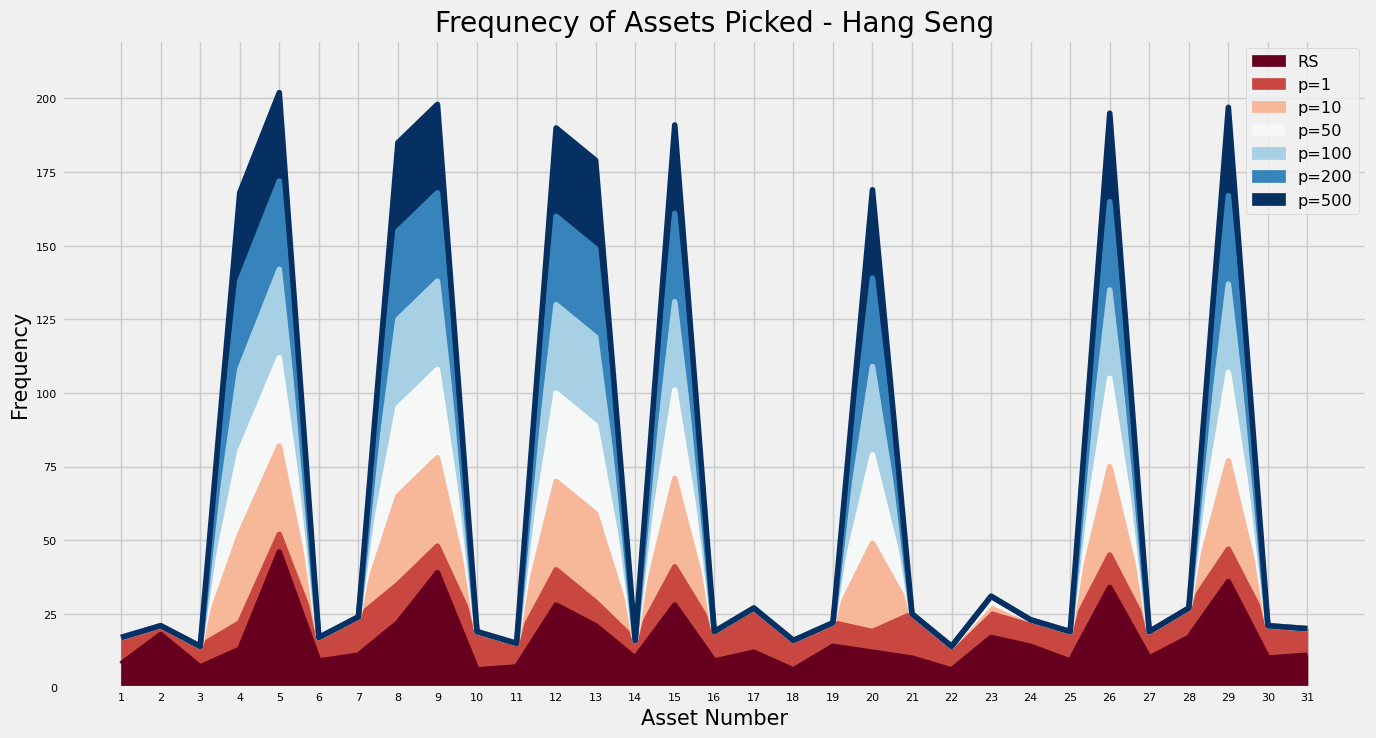

In [17]:
assets_picked_GA = []
assets_picked_RS = results_RS['assets1'][['asset_{}'.format(i) for i in range(1,11)]]
for file in file_names:
    for p_size in population_sizes:
        assets_picked_GA.append(results_GA_P['{}_{}'.format(file,p_size)][['asset_{}'.format(i) for i in range(1,11)]])

li_all = []
for i in range(6):
    df_GA = assets_picked_GA[i].loc[:,'asset_1'].value_counts().add(assets_picked_GA[i].loc[:,'asset_2'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_3'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_4'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_5'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_6'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_7'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_8'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_9'].value_counts(), fill_value = 0).add(assets_picked_GA[i].loc[:,'asset_10'].value_counts(), fill_value = 0)
    li_all.append(df_GA)

df_RS = assets_picked_RS['asset_1'].value_counts().add(assets_picked_RS['asset_2'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_3'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_4'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_5'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_6'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_7'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_8'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_9'].value_counts(), fill_value = 0).add(assets_picked_RS['asset_10'].value_counts(), fill_value = 0)

df_assets_picked_GA = pd.concat([i for i in li_all], axis = 1)
df_assets_picked_all = pd.concat([df_RS, df_assets_picked_GA], axis = 1)
df_assets_picked_all = df_assets_picked_all.fillna(0)
col_names = ['RS','p=1', 'p=10', 'p=50', 'p=100', 'p=200', 'p=500']
df_assets_picked_all.columns = col_names
df_assets_picked_all.index = df_assets_picked_all.index + 1

ax = df_assets_picked_all.plot.area(use_index = True, fontsize = 8,  cmap = plt.get_cmap('RdBu'), figsize = (15,8))
ax.title.set_text("Frequnecy of Assets Picked - Hang Seng")
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Asset Number', fontsize = 15)
ax.set_ylim(0,220)
ax.set_xticks(df_assets_picked_all.index)
ax.legend(fontsize = 'small')
plt.show()

As we can see, population size of 1 is not appropriate for optimizing the portfolios, as compared to other P values, it does not seem to have a rigid system for selecting the stocks. Its pattern is almost indistinguishable to the one of RS. On the contrary, for any p >= 10 the algorithm's procedure for choosing portfolio assets is almost identical. It is the main reason behind the similarity of performance between varying values of the parameter.

## Conclusion

To conclude, first part of the analysis focused on comparing the optimization perfomance of random search and genetic algorithms. In both cases the goal of the optimization was to minimize the F-value. It was argued that genetic algorithm clearly outperforms random search for all aspects analysed, but one. The only exception was covariance where RS portfolios displayed lower values. Nevertheless, this was expected since GA optimized portfolios proved to have higher returns. Combining covariance and expected return in the goal metric has shown that higher covariance values for GA were significantly offset by its higher expected return.

Examination of efficient frontiers revealed that for all 5 datasets, GA portfolios offer much better risk/return combinations. Based on this analysis, for a risk averse investor it is recommended to invest into portfolios from the S&P 100 index, risk taking investor should invest into portfolios from the Hang Seng index and lastly
for an investor with balanced preference towards risk/return it is advised to invest into portfolios from the DAX 100 index (assuming all portfolios laying on specific part of the efficient frontiers).

Second to last part of the analysis looked at allocation of weights. Comparing the asset weight assignment for the two algorithms has shown that RS selects weights almost totally irrespective of the prescribed attitude towards risk. GA, on the contrary, allocates investment such that for risk taking preference it maximizes expected return and for the risk averse preference it minimizes covariance.

Lastly we looked at how the performance of GA changes with varying values of population size. Six values of population size (p) were tested and scored using the minimum median value of F. GA's performance remained very similiar for all six values, except for p=1 where the performance lagged behind. The optimal value for p somewhat varied across datasets, however at the end it was established that p=100 is best. The analysis concluded by showing that p=1 and random search follow very similar pattern when it comes to selecting portfolio assets.

## Next Steps

For further development of this project the following areas of improvement are suggested. 

Firstly the code for optimizing the portfolios (i.e. Random Search.py and Genetic Algorithm.py) is rather inefficient. Given relatively high number of iterations (Number of assets in an index * 1000 for every value of 𝜆) coupled with ineffective ways for calaculations resulted in extensive runing times. Reducing run times of the codes would significantly improve chances of the project being used for a real world application.

Secondly, testing genetic algorithm for much larger population sizes i.e. p > 1000.

Lastly,  T.-J. Chang, et. al (2000) offer heuristics for two more algorithms (i.e. tabu search and simulated annealing). Their implementation and comparison of performance with random search and genetic algorithms may offer interesting insights.

## References

Chang, T., Meade, N., Beasley, J. and Sharaiha, Y., 2000. Heuristics for cardinality constrained portfolio optimisation. Computers & Operations Research, 27(13), pp.1271-1302.

En.wikipedia.org. 2021. Hang Seng Index - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Hang_Seng_Index> [Accessed 18 June 2021].

Investopedia. 2021a. Calculating Covariance for Stocks. [online] Available at: <https://www.investopedia.com/articles/financial-theory/11/calculating-covariance.asp> [Accessed 18 June 2021].

Investopedia. 2021b. Efficient Frontier Definition. [online] Available at: <https://www.investopedia.com/terms/e/efficientfrontier.asp> [Accessed 18 June 2021].